In [35]:
from nilearn import image
import numpy as np
from nilearn import plotting


subject = '08'
session = 1

responses = image.load_img(f'/data/ds-neuralpriors/derivatives/glm_stim1.denoise.smoothed/sub-{subject}/ses-{session}/func/sub-{subject}_ses-{session}_task-task_space-T1w_desc-response_pe.nii.gz')
stimulus = image.load_img(f'/data/ds-neuralpriors/derivatives/glm_stim1.denoise.smoothed/sub-{subject}/ses-{session}/func/sub-{subject}_ses-{session}_task-task_space-T1w_desc-stim_pe.nii.gz')
t1w = image.load_img(f'/data/ds-neuralpriors/derivatives/fmriprep/sub-{subject}/ses-{session}/anat/sub-{subject}_ses-{session}_desc-preproc_T1w.nii.gz')

In [36]:
data = [image.index_img(responses, ix) for ix in range(responses.shape[-1])]

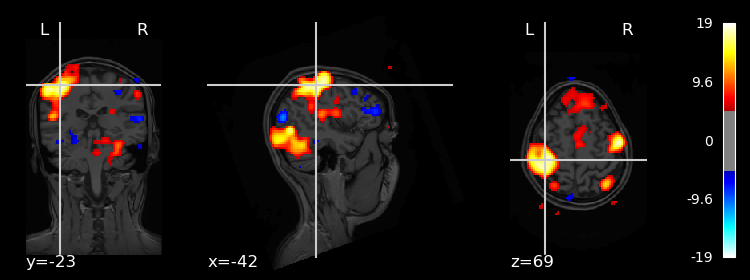

In [37]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

design_matrix = pd.DataFrame(np.ones((responses.shape[-1], 1)), columns=['intercept'])

second_level_model = SecondLevelModel(smoothing_fwhm=8.0, n_jobs=2)
second_level_model = second_level_model.fit(
    data,
    design_matrix=design_matrix,
)

z_map = second_level_model.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)


plotting.plot_stat_map(z_map, t1w, threshold=5.)

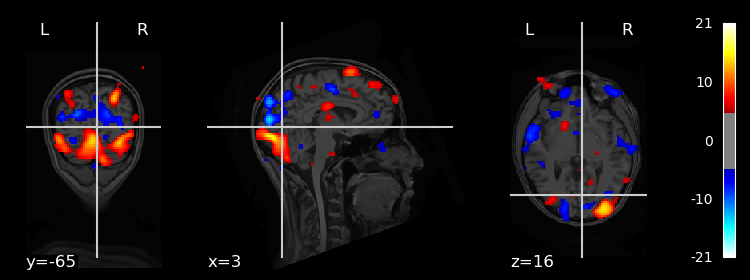

In [38]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd
data = [image.index_img(stimulus, ix) for ix in range(responses.shape[-1])]
design_matrix = pd.DataFrame(np.ones((responses.shape[-1], 1)), columns=['intercept'])

second_level_model = SecondLevelModel(smoothing_fwhm=8.0, n_jobs=2)
second_level_model = second_level_model.fit(
    data,
    design_matrix=design_matrix,
)

z_map = second_level_model.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)


plotting.plot_stat_map(z_map, t1w, threshold=5.)